# Fetch Stock Price Data by `yfinanace`

In [12]:
import yfinance as yf

# Download historical data for Apple (AAPL)

data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')

data.head()


C:\Users\abuba\AppData\Local\Temp\ipykernel_15472\3765711592.py:5: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620865,72.681312,71.373241,71.627115,135480400
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


In [13]:
data.shape

(1257, 5)

# Prepare Features and Target

- Target:
    - Open, High, Low and Volumn
- Features:
    - Next Day

In [14]:
data.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1257 non-null   float64
 1   (High, AAPL)    1257 non-null   float64
 2   (Low, AAPL)     1257 non-null   float64
 3   (Open, AAPL)    1257 non-null   float64
 4   (Volume, AAPL)  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [16]:
data['Target'] = data['Close'].shift(-1)  # next day's Close
data.dropna(inplace=True)

X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Target']


In [17]:
X.shape, y.shape

((1256, 4), (1256,))

# Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(
    fit_intercept=True,
    copy_X=True,
    n_jobs=None
)
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Predict and Evaluate

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')


MSE: 7.39
MAE: 2.03


# Visualization Prediction vs Actual

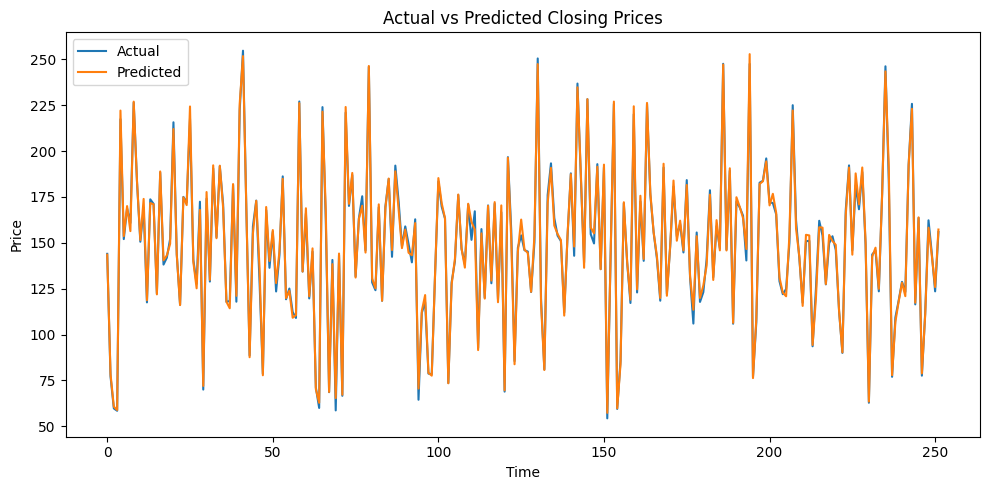

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()
